In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

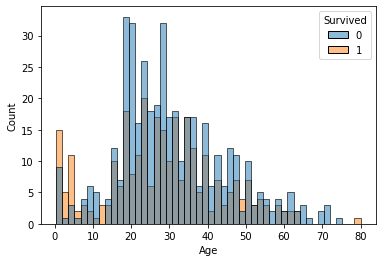

In [20]:
sns.histplot(x=train['Age'],hue=train['Survived'],bins=50)

In [22]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [35]:
agenul=train['Age'].isnull()
nullind=agenul[agenul==True].index

In [37]:
tind=train['Age'].index
tind

RangeIndex(start=0, stop=891, step=1)

In [43]:
ageind=[]
for i in tind:
    if i not in nullind:
        ageind.append(i)

In [41]:
nullind

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [47]:
ytrain=train.loc[ageind,'Age']

In [48]:
ytest=train.loc[nullind,'Age']

In [50]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [53]:
xtrain=train.loc[ageind,['Survived','Pclass','SibSp','Parch']]

In [54]:
xtest=train.loc[nullind,['Survived','Pclass','SibSp','Parch']]
xtest

,Survived,Pclass,SibSp,Parch
5,0,3,0,0
17,1,2,0,0
19,1,3,0,0
26,0,3,0,0
28,1,3,0,0
...,...,...,...,...
859,0,3,0,0
863,0,3,8,2
868,0,3,0,0
878,0,3,0,0


In [55]:
linreg=LinearRegression()

In [56]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [58]:
pred=linreg.predict(xtest)

In [61]:
pred=np.around(pred)

In [69]:
pred[pred<0]=5

<AxesSubplot:xlabel='Age', ylabel='Count'>

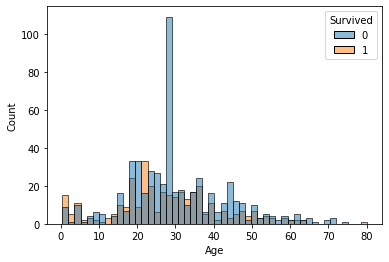

In [85]:
sns.histplot(x=train['Age'],hue=train['Survived'],bins=50)

In [77]:
ytest=pred

In [82]:
train.loc[nullind,'Age']=pred

In [89]:
a15=train['Age']

In [95]:
len(a15[a15>45])

103

In [9]:
train['Aged']=pd.cut(x=train['Age'],bins=[-1,18,30,45,100],labels=False)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

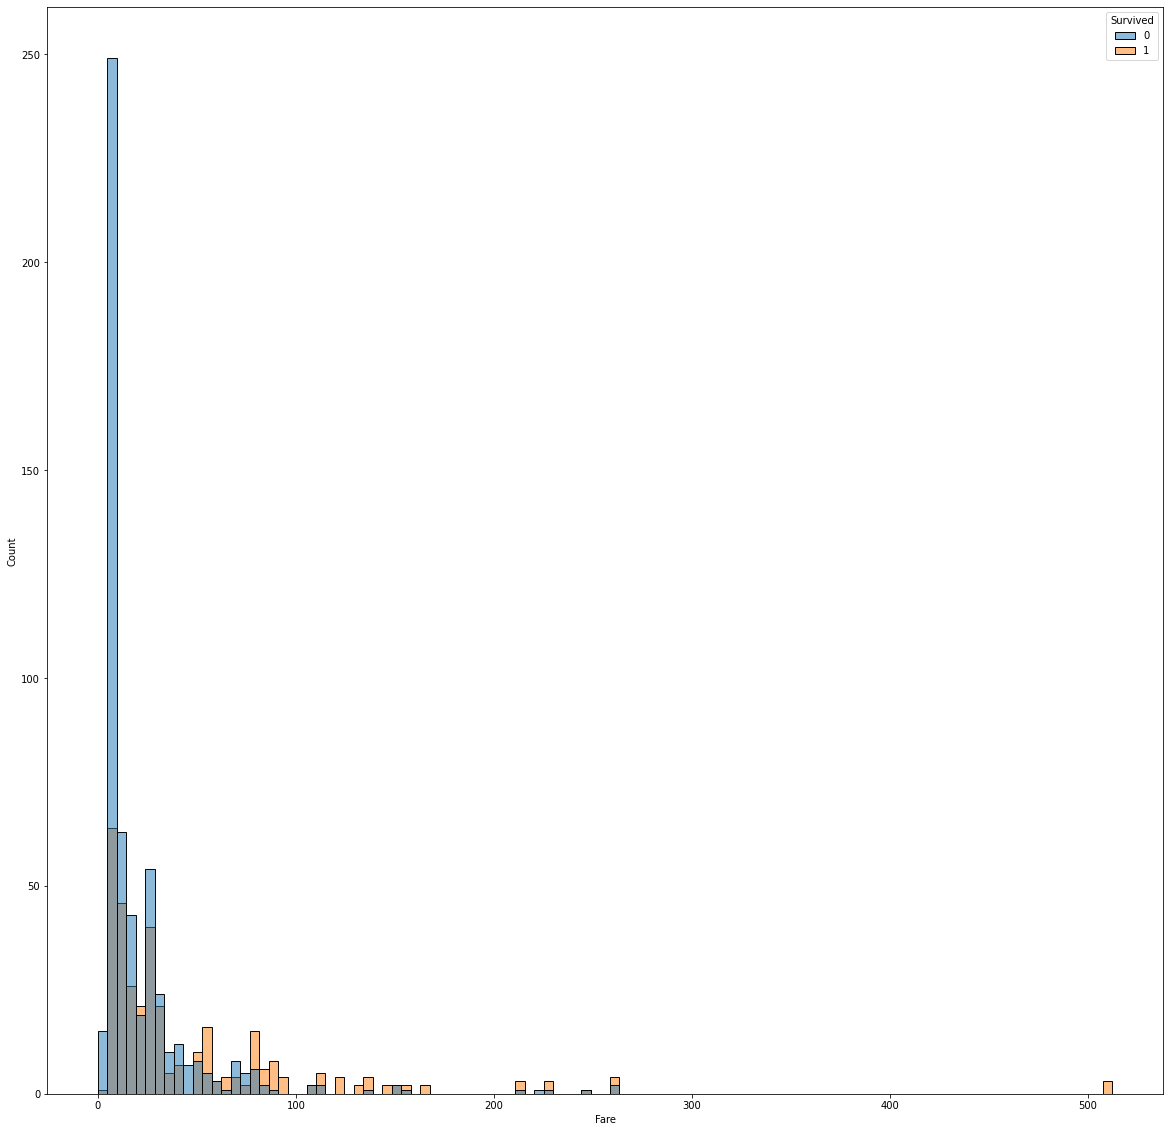

In [109]:
plt.figure(figsize=(20,20))
sns.histplot(x=train['Fare'],hue=train['Survived'])

In [157]:
train['Fared']=pd.cut(x=train['Fare'],bins=[-1,10,45,1000],labels=False)

In [123]:
train['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

<AxesSubplot:ylabel='count'>

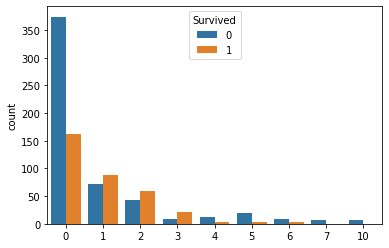

In [128]:
sns.countplot(x=(train['SibSp']+train['Parch']),hue=train['Survived'])

In [4]:
train['Family']=pd.cut(x=(train['SibSp']+train['Parch']),bins=[-1,0,3,10],labels=False)

In [5]:
train['Family'].value_counts()

0    537
1    292
2     62
Name: Family, dtype: int64

In [142]:
log=LogisticRegression()

In [150]:
train[['Q','S']]=pd.get_dummies(train['Embarked'])[['Q','S']]

In [239]:
x=train[['Pclass','Sex','Aged','Fared','Family']]
y=train['Survived']

In [236]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [237]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [238]:
f1_score(log.predict(xtest),ytest)

0.7239263803680981

In [240]:
log=LogisticRegression()

In [241]:
log.fit(x,y)

LogisticRegression()

In [242]:
import pickle

In [243]:
pickle.dump(log,open('titanic.pkl','wb'))

In [244]:
loadmodel=pickle.load(open('titanic.pkl','rb'))

In [246]:
loadmodel.score(xtest,ytest)

ValueError: X has 4 features per sample; expecting 5

In [247]:
x

,Pclass,Sex,Aged,Fared,Family
0,3,0,1,0,1
1,1,1,2,2,1
2,3,1,1,0,0
3,1,1,2,2,1
4,3,0,2,0,0
...,...,...,...,...,...
886,2,0,1,1,0
887,1,1,1,1,0
888,3,1,1,1,1
889,1,0,1,1,0


In [248]:
xtest

,Pclass,Sex,Aged,Family
314,2,0,2,1
25,3,1,2,2
774,2,1,3,2
393,1,1,1,1
726,2,1,1,1
...,...,...,...,...
890,3,0,2,0
477,3,0,1,1
867,1,0,2,0
567,3,1,1,2
